# Identifying a Cultural Pattern: A Pilot Study into "#BLM"

### 1. Construct a final project research question related to the interpretation of a cultural pattern that interests you (i.e. "Why is #ThrowbackThursday employed in a different way by Group A than it is by Group B?").

For my final project, I ask, how do local #BLM Twitter conversations in 2016 compare to discourse at the national level during the summer of 2020? 

I hypothesize that the primary relationship between the Sign-vehicle and the Object remains Indexical, however, the Objects themselves have changed over time, paving the way for new interpretants. For example, in 2016, I imagine that the hashtag indexically points to an act of police violence against a Black person in the United States. Here the intepretant is that Black lives are significant, but the Sign-vehicle is also being used as a way to spread information about an event. Four years down the road, racism persists, but I imagine that that on top of information sharing, the hashtag will also point to widespread protests across the country alongside every day racism. While the overall interpretant is consistent -- Black lives are valuable despite racial bias and violence -- new meanings would also emerge. Twitter users who use the hashtag are not only sharing information, but they are indexically positioning themselves along ideological/political spectrum and shaping their identities as individuals who use the hashtag end up iconically resembling another person who uses it as well.

### 2. What digital data could you use to study this phenomenon and answer your research question? How could you collect this data? Consult the [Final Project Assignment Page](https://canvas.uchicago.edu/courses/32762/assignments/302908) for several data search tools and feel free to talk with your instructor or TA if you have any further questions about how you might find and collect data related to your research question.

I plan on using Tweets from between 2016 and 2020 that include the hashtag blacklivesmatter or blm or some variation. I am assuming usage between "#blm" and "#blacklivesmatter" will not be different. [arXiv](https://arxiv.org), an open access repository of electronic preprints owned by Cornell University, has shared [Tweet IDs](https://zenodo.org/record/4056563#.YCW73C1h1hE) for 41.8 million tweets from 10 million different users.

### 3. Download this data on your computer (if you are web-scraping, or have an exceptionally challenging data source to gather from and analyze, you may choose to download only a subset of the data for the purposes of this assignment) and load it into your Python Jupyter notebook. Print out a small sample of your data in your Jupyter notebook (i.e. using the .head() command, if you're using Pandas).

Due to Twitter's user guidelines, the Tweet ID link shared above only contains unique identifiers linked to a specific tweet. It does not contain the actual text of the tweet itself. These tweet IDs need to be "hydrated" first. Essentially, after opening the downloaded CSV file from arXiv, I grabbed the last 500,000 tweet IDs and saved them into a .txt file. From there, I used [hydrator](https://github.com/DocNow/hydrator), an open source application that takes in a list of tweet IDs and returns a .csv file which contains the text of the tweet in addition to metadata such as the date/time of tweet and the number of retweets, if any.

Twitter rate limits the number of tweets that can be "hydrated" over a given amount of time, which is why I decided to use half a million tweet IDs for this assignment. This returned about 389,000 tweets for an initial analysis. I plan on using more data for the final project. I estimate that it would take around 10 hours to hydrate 1,000,000 tweet IDs. 

In [1]:
from gensim import corpora, models
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
import pandas as pd
import re
import string
import warnings

pd.options.display.max_columns = None  # Shows all columns of a dataframe in Jupyter Notebook
warnings.filterwarnings('ignore')  # Supress warnings from being displayed

Load in and print first five rows of the dataframe.

In [2]:
def data_loader():
    """Loads in BLM Tweets."""

    df = pd.read_csv(
        '/users/danielchen/desktop/blm_tweets_389k.csv', low_memory=False)
    
    return df

In [3]:
blm = data_loader()
blm.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Jul 15 17:06:28 +0000 2016,BlackLivesMatter,https://twitter.com/TheWire985/status/75399918...,http://buff.ly/29I1p76,1,753999182835412993,NaN,NaN,NaN,en,NaN,False,1,NaN,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",How Black Radio Hurts #BlackLivesMatter https:...,https://twitter.com/TheWire985/status/75399918...,Sun Apr 03 19:07:21 +0000 2016,TheWire985,False,"FM Radio: Music-Talk. Hip-Hop, R&B, and Timele...",109,306,123,16,Orlando,The Wire 98.5,TheWire985,79016,NaN,http://www.TheWire985.com,False
1,NaN,Fri Jul 15 17:12:17 +0000 2016,blacklivesmatter,NaN,http://chi.mg/29UAAkx,0,754000645536047104,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://mobile.twitter.com"" rel=""nofol...","Incredible, incredible girls!! How 4 Teenage G...",https://twitter.com/Womens_Wire/status/7540006...,Fri Apr 04 05:48:22 +0000 2014,Womens_Wire,False,A platform for the voices and activism of inte...,13307,585,619,38,United States,Women's Wire,Womens_Wire,10666,NaN,https://www.womenswiremedia.org/,False
2,NaN,Fri Jul 15 17:11:43 +0000 2016,BlackLivesMatter,NaN,https://twitter.com/pj1017__/status/7539991226...,0,754000504775118848,NaN,NaN,NaN,und,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",#BlackLivesMatter 😂😂 https://t.co/tT8lxhw8sF,https://twitter.com/BigP____/status/7540005047...,Sun Oct 10 12:01:58 +0000 2010,BigP____,False,Rest in Peace Quwan Forever My Brother,1043,2925,1365,7,With Jb ✌,Sosa mommy,BigP____,99467,NaN,NaN,False
3,NaN,Fri Jul 15 17:14:08 +0000 2016,blacklivesmatter,NaN,NaN,0,754001110394806272,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",You cannot link arms under a universalist bann...,https://twitter.com/casbahgal/status/754001110...,Wed Oct 24 18:13:57 +0000 2012,casbahgal,False,"Sociology Professor to some, Mom to those few :)",3045,65,220,10,NaN,Denise,casbahgal,1449,NaN,NaN,False
4,NaN,Fri Jul 15 17:12:53 +0000 2016,alllivesmatter blacklivesmatter,NaN,NaN,1,754000798133084160,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",If I ever go on a real first date my first que...,https://twitter.com/SixFootShawty/status/75400...,Sun Apr 05 22:26:16 +0000 2015,SixFootShawty,False,2 Corinthians 5:17 | Towson Alumna | BGM✨,28319,417,397,5,In Christ,Omolere,SixFootShawty,33338,NaN,NaN,False


### 4. Using your data, empirically demonstrate in Python that the cultural phenomenon you are studying consists of replicas from a common legisign, with the same interpretants and sign relations.

In this section, I create four plots using code from Dr. Clindaniel's lectures:

1. Top nouns from tweets posted in 2020
2. Top nouns from tweets posted in 2016
3. TF-IDF plot from tweets posted in 2020
4. TF-IDF plot from tweets posted in 2016

I intend to use the noun plots to gain insight into how, if at all, the objects that the sign-vehicle refer to have changed over the four year period. Similarly, I use the TF-IDF plot to give weight to words in order to better understand their importance in each time period. 

#### Plotting Top Nouns:

Clean data.

In [4]:
def data_cleaner(dataframe):
    """Replaces words, removes hyperlinks, and creates a new column
    with the year in which the tweet was tweeted.
    """

    df = dataframe.copy()

    # Replaces cops and officers to police 
    replacements = {
        'text': {
            'cops': 'police',
            'cop': 'police',
            'officers': 'police',
            'officer': 'police'    
        }
    }    
    df.replace(replacements, regex=True, inplace=True)

    # Replaces hyperlinks with an empty string character
    link_format = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    df['text'] = df['text'].str.replace(link_format, '') 
    
    # Creates new column that is just the year 
    df['year'] = [date[-4:] for date in df['created_at']]

    return df

In [5]:
blm = data_cleaner(blm)

Split tweets into 2016 and 2020 data.

In [6]:
def data_splitter(dataframe, year):
    """Splits tweet dataframe by a specified year."""

    df = dataframe.copy()

    df = df[df['year'] == year]
    
    return df 

In [7]:
blm_2020, blm_2016 = [data_splitter(blm, year) for year in ['2020', '2016']]

Define stop words to be removed from lemmatization and instantiate nltk's `TweetTokenizer` function.

In [8]:
# Define stop words specific to BLM tweets
blm_stops = [
    '#blacklivesmatter',
    '#blklivesmatter',
    '#bluelivesmatter',
    '#alllivesmatter',
    'people',
    'movement',
    'lives',
    'matter',
    'blue',
    'blm',
    'time',
    'today',
    'rt',
    '…',
    '’',
    'thanks',
    'oop',
    'real',
    'bow',
    'tadaaaaaan',
    'bravo',
    'stfu',
    'real',
    'pussy',
    'cc'
]
stop_words = (nltk.corpus.stopwords.words('english')
                + list(string.punctuation)
                + blm_stops)
    
# Instantiate nltk's TweetTokenizer function 
tknzr = TweetTokenizer()

Use functions from Dr. Clindaniel's class to tokenize text and plot top nouns.

In [9]:
def pos_tag(text):
    """Returns a tokenized word alongside its corresponding part of
    speech tag. From Dr. Clindaniel's lecture. 
    """
    
    tokens = [i for i in tknzr.tokenize(text.lower()) if i not in stop_words]
    pos_tagged = nltk.pos_tag(tokens)
    
    return pos_tagged


def plot_top_pos(series, data_description, pos):
    """Plots the top 25 words tagged to a part of speech.
    From Dr. Clindaniel's lecture.
    """

    pos_tagged = series.apply(pos_tag)

    pos_tagged_full = []
    for i in pos_tagged:
        pos_tagged_full.extend(i)

    fd = nltk.FreqDist(word + "/" + tag for (word, tag)
                       in pos_tagged_full if tag[:2] == pos)
    fd.plot(25, title='Top 25  ' + data_description)
    
    return

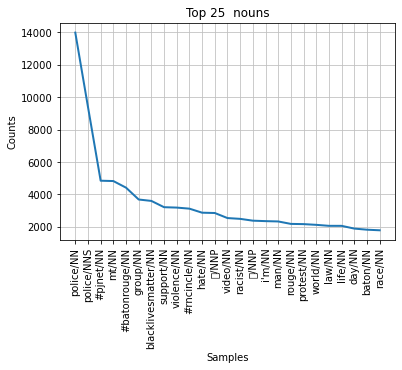

In [10]:
plot_top_pos(blm_2016['text'], 'nouns', 'NN')

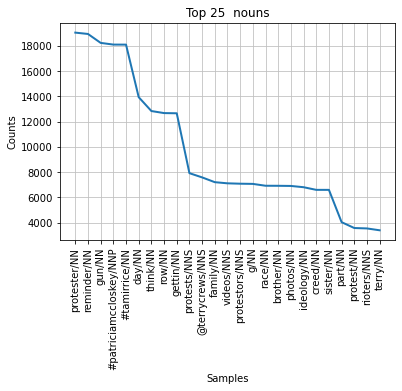

In [11]:
plot_top_pos(blm_2020['text'], 'nouns', 'NN')

#### TF-IDF Plots:

Remove Twitter handles from the analysis.

In [12]:
def remove_pattern(input_txt, pattern):
    """Removes Twitter handles from tweets, otherwise 
    they rank high on a TF-IDF plot.
    """
    
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

Create new dataframes and columns without the handles.

In [13]:
blm_2020['text_no_users'] = np.vectorize(remove_pattern)(blm_2020['text'], "@[\w]*") 
blm_2016['text_no_users'] = np.vectorize(remove_pattern)(blm_2016['text'], "@[\w]*") 

Using functions from Dr. Clindaniel's class, create the TF-IDF plots.

In [14]:
def get_wordnet_pos(word):
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': nltk.corpus.wordnet.ADJ,
        'N': nltk.corpus.wordnet.NOUN,
        'V': nltk.corpus.wordnet.VERB,
        'R': nltk.corpus.wordnet.ADV
    }

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)


def get_lemmas(text):
    """Tokenizes a series of text and returns their corresponding
    lemmas.
    """

    tokens = [i for i in tknzr.tokenize(text.lower()) if i not in stop_words]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t))
              for t in tokens]

    return lemmas


def plot_top_tfidf(series, data_description, n = 20):

    lemmas = series.apply(get_lemmas)
    
    dictionary = corpora.Dictionary([i for i in lemmas])

    bow_corpus = [dictionary.doc2bow(text) for text in lemmas]
    
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_weights = {}
    for doc in tfidf[bow_corpus]:
        for ID, freq in doc:
            tfidf_weights[dictionary[ID]] = np.around(freq, decimals = 2)

    top_n = pd.Series(tfidf_weights).nlargest(n)
    
    plt.plot(top_n.index, top_n.values)
    plt.xticks(rotation='vertical')
    plt.title('Top {} Lemmas (TFIDF) for '.format(n) + data_description);
    
    return

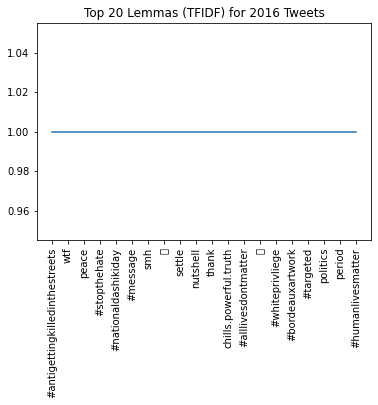

In [15]:
plot_top_tfidf(blm_2016['text_no_users'], '2016 Tweets')

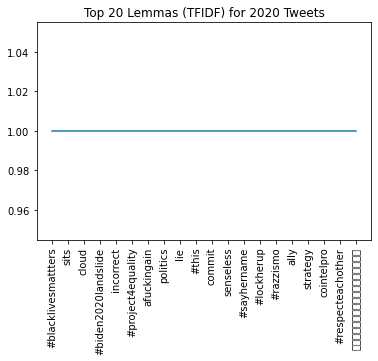

In [16]:
plot_top_tfidf(blm_2020['text_no_users'], '2020 Tweets')

#### Discussion:

The top 25 noun plots from both 2020 and 2016 demonstrate that the usage of the hashtag BlackLivesMatter (#BLM) is a replica of a legisign because the digital sign-vehicle follows the same convention every time it is used. Black Lives Matter evokes instances of racial injustice, and unsurprisingly, the plots provide empirical evidence that Twitter users are also discussing racial injustice alongside the hashtag. From the Top 25 Nouns in 2016 plot, police (and variations of the term such as “officer” and “cop”) dominate the distributions of all nouns in the corpus. The words “racist” and “violence” stand out as well. In conjunction all three terms support the argument that the online sign, #blm, is consistently used to refer to police brutality against Black people. One question worth asking is if these conventions hold over a longer period. In turning to the Top 25 Nouns in 2020 plot, it is evident that the rules governing the legisign hold four years later. Tamir Rice’s name is the fifth most popular noun in addition to the words “gun” and “race” which rank third and sixteenth respectively. These terms suggest that the hashtag continues to be used to refer to police violence, as Tamir Rice, a 12-year-old Black boy was murdered by officer Timothy Loehmann 6 years prior. These consistent patterns suggest that the sign is being produced and reproduced in a similar fashion over time. 

It is also worth highlighting that the nouns in 2020 are not completely identical to the nouns four years prior. While the relationship between the sign-vehicles and the objects remains indexical across the two years, the sign-vehicles are pointing to different events/people. In 2016, the objects are primarily about police officers and institutionalized violence. Conversely, in 2020, there is more of a variety of objects. Protestors, Patricia McCloskey, and Terry Crews emerge as objects in relation to the hashtag. These new nouns suggest that #BLM does not only indexically point to institutionalized racism, but it also refers to agency and resistance against racism (in the words “protester” and “protest”) as well as the non-institutional manifestations of racism seen in mentions of Patricia McCloskey who held guns at Black Lives Matter protestors in St. Louis along with her husband. References to Terry Crews similarly highlight how #BLM refers to the ways in which Whiteness is centered when he tweeted “We must ensure #blacklivesmatter doesn't morph into #blacklivesbetter.”

Overall, the interpretant is consistent. The hashtag is used to stand against racism towards Black people. However, the objects in each respective year are slightly different. The objects indexically correlated to the sign-vehicle suggest that replication of the legisign indexically position Twitter users’ values as usage creates an iconic resemblance to other hashtag users. 

In addition to the Top Nouns plots, I also created at TF-IDF plot by implementing the code from Dr. Clindaniel's hands-on fashion lecture. In looking at the TF-IDF plots, the story is relatively less clear. It's evident that the interpretant is about racial inequities in both years as "blacklivesmatter" is one of the most important terms in the 2020 plot (unsurprisingly) and "whiteprivilege" is prominent in the 2016 plot. However, it's a bit more difficult to make sense of the terms here compared to the Top Nouns plots because words like "sits", and hashtags like "this" appear in the 2020 TF-IDF plot while words like "thank", "settle", and "nutshell" stand out in the 2016 TF-IDF plot. Even so, there's a sense that the conversation has changed slightly when comparing the TF-IDF plots in 2016 versus 2020. The hashtag "aintgettingkilledintestreets" pops out in the 2016 plot which is a reference to the police brutality that is also evident in the noun plot for that same year. And in the 2020 TF-IDF plot, the word "ally" also jumps out which seems to hint at the possibility that the hashtag is used to indexically position a user's beliefs. By tweeting #BLM, users are positioning themselves as supporters of the movement.

### 5. What are your next steps beyond this basic identification of a cultural pattern? Do you need to gather any additional information? Do you need to perform any additional analyses in order to successfully answer your research question? How will these additional sources and/or analyses enable you to answer your research question? Provide a 200+ word response to these questions

In order to fully answer my research question, I will need to:

1.	Analyze a larger set of the data
2.	Explore tweets on a spatial dimension not only a temporal dimension
3.	Uncover how Twitter users are using words like “officer” and “protester” are being used in relation to other words

First, I plan on looking at more tweets. My initial analysis only looked at 389,000 tweets because of computing power, but the file available on arXiv contains more than 41 million total tweets. Looking at a larger portion of the data will allow me to uncover more widespread trends that aren’t swayed by the size of tweets. In other words, looking at a larger subset of the data can allow me to compare a more complete picture as to how the #blm discourse on Twitter has changed or remained the same in the span of four years. 

Second, my current analysis only looks at tweets in 2016 versus tweets in 2020. Moving forward, I will also need to look at location if I’m interested in comparing local conversations to ones at the national level. “Hydrating” tweet IDs can also reveal metadata such as coordinates. For my final project, I can use coordinates to group and compare tweets based on location. 

Third, I need to move beyond analyzing individual words. The individual words, hashtags, and phrases provide a sense of what the conversation looks like in each year (such as police brutality vs. protests), but a more complete analysis will look at how these words are being used in relation to other terms.  

### Citations

1. `pos_tag`, `plot_top_pos`, `get_lemmas`, and`get_wordnet_pos` functions: Dr. Clindaniel's hands-on fashion lecture from 2/4/2021
2. Removing hyperlinks from tweets: https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe/51994366
3. Removing user names from tweets: https://stackoverflow.com/questions/50830214/remove-usernames-from-twitter-data-using-python